IMPORTING LIBRARY

In [85]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

READING DATASET

In [86]:
df= pd.read_csv('Dataset of Diabetes .csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [87]:
print(df['CLASS'].value_counts())

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [88]:
print(df.isnull().sum())
df =df.drop(columns=['ID','No_Pation'],axis=1)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


NORMALIZATION

In [89]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = df['CLASS'].str.strip().str.upper()
df["CLASS"]=df["CLASS"].astype("category") 
df['CLASS_CODE'] = df['CLASS'].cat.codes
df['CLASS_CODE'].value_counts()

CLASS_CODE
2    844
0    103
1     53
Name: count, dtype: int64

DRAWING HEATMAP

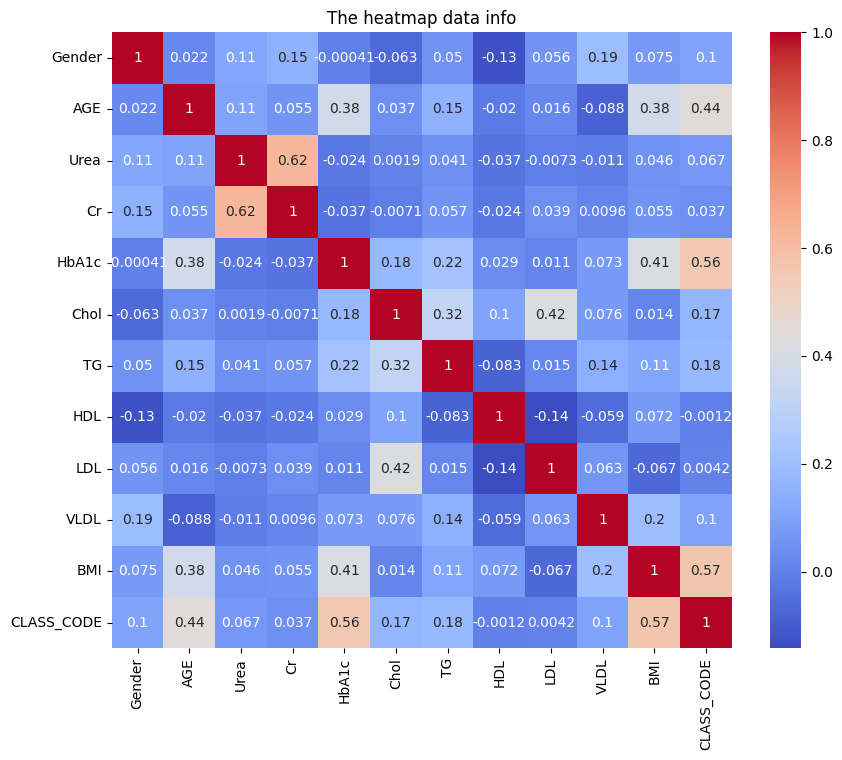

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('The heatmap data info')
plt.show()

PREPROCESSING AND ENCODING AND SPLIT THE DATASET

In [93]:
x=df.drop(columns=["CLASS","CLASS_CODE"])
y=df["CLASS_CODE"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

DEF FOR REPORT ABOUT MODELS

In [94]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):

    start_time = time.time()
    
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"🔹 {model_name} Accuracy on Test Set: {test_acc:.4f}")
    print(classification_report(y_test, y_pred_test))

    print(f"✅ Train Accuracy: {train_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"⏱️ Elapsed Time: {elapsed_time:.4f} seconds")

    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


LOGISTICREGRESSION

🔹 Logistic Regression Accuracy on Test Set: 0.9350
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.46      0.60      0.52        10
           2       0.98      0.96      0.97       169

    accuracy                           0.94       200
   macro avg       0.77      0.82      0.79       200
weighted avg       0.94      0.94      0.94       200

✅ Train Accuracy: 0.9388
✅ Test Accuracy: 0.9350
⏱️ Elapsed Time: 0.0145 seconds


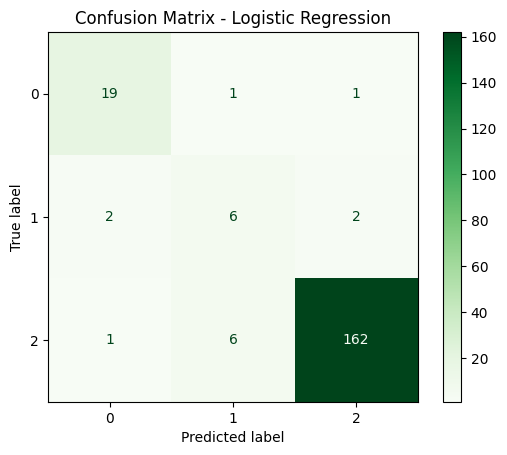

In [95]:
logistic_model = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
evaluate_model(logistic_model, X_train_res, y_train_res, x_test_scaled, y_test, model_name="Logistic Regression")

SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Best Parameters: {'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
🔹 Best SVM (GridSearch) Accuracy on Test Set: 0.9600
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.88      0.70      0.78        10
           2       0.97      0.99      0.98       169

    accuracy                           0.96       200
   macro avg       0.91      0.83      0.87       200
weighted avg       0.96      0.96      0.96       200

✅ Train Accuracy: 0.9995
✅ Test Accuracy: 0.9600
⏱️ Elapsed Time: 0.0572 seconds


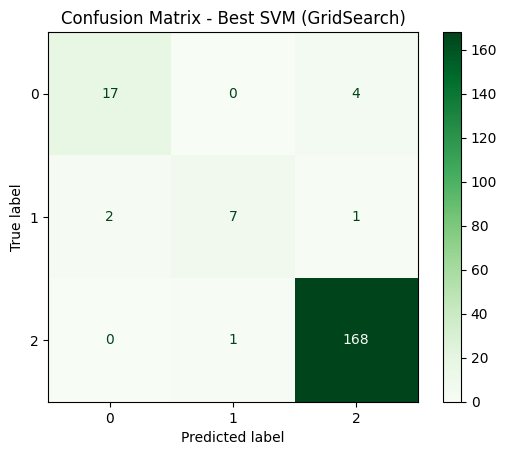

In [96]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': ['balanced']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

best_svm = grid_search.best_estimator_
print("🔍 Best Parameters:", grid_search.best_params_)

evaluate_model(best_svm, X_train_res, y_train_res, x_test_scaled, y_test, model_name="Best SVM (GridSearch)")


🔹 XGBoost with SMOTE Accuracy on Test Set: 0.9900
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200

✅ Train Accuracy: 1.0000
✅ Test Accuracy: 0.9900
⏱️ Elapsed Time: 0.0942 seconds


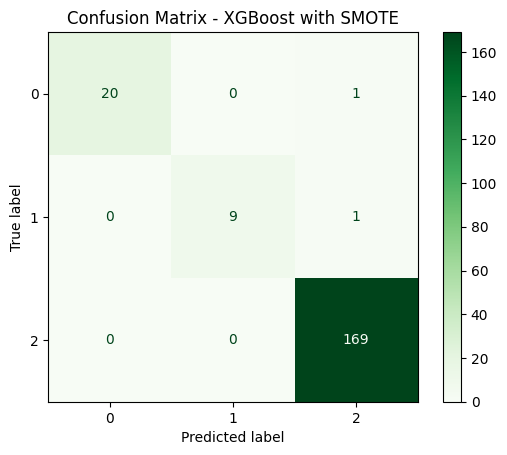

In [97]:
xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)
evaluate_model(xgb_model, X_train_res, y_train_res, x_test_scaled, y_test, model_name="XGBoost with SMOTE")

RANDOM FOREST

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔍 Best Parameters for RF: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
🔹 Random Forest (GridSearch) Accuracy on Test Set: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200

✅ Train Accuracy: 1.0000
✅ Test Accuracy: 0.9950
⏱️ Elapsed Time: 0.5215 seconds


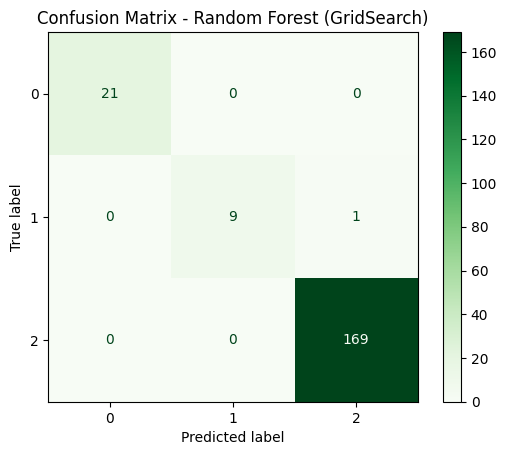

Feature Importances:
HbA1c: 0.4859
BMI: 0.2159
AGE: 0.1321
TG: 0.0376
Chol: 0.0347
VLDL: 0.0297
LDL: 0.0180
Urea: 0.0160
Cr: 0.0134
HDL: 0.0091
Gender: 0.0075


In [100]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_res, y_train_res)

print("🔍 Best Parameters for RF:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_

evaluate_model(best_rf, X_train_res, y_train_res, x_test_scaled, y_test, model_name="Random Forest (GridSearch)")


feature_names = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

importances = best_rf.feature_importances_

feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feat_imp:
    print(f"{feature}: {importance:.4f}")


ANN 

Epoch 1/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4912 - loss: 1.0042 - val_accuracy: 0.0000e+00 - val_loss: 1.3868 - learning_rate: 1.0000e-04
Epoch 2/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.6862 - val_accuracy: 0.0000e+00 - val_loss: 1.3844 - learning_rate: 1.0000e-04
Epoch 3/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4514 - val_accuracy: 0.0346 - val_loss: 1.1934 - learning_rate: 1.0000e-04
Epoch 4/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.4044 - val_accuracy: 0.2938 - val_loss: 0.9986 - learning_rate: 1.0000e-04
Epoch 5/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 0.4022 - val_accuracy: 0.4049 - val_loss: 0.9008 - learning_rate: 1.0000e-04
Epoch 6/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.3636 - val_accuracy: 0.4889 - val_loss: 0.9079 - learning_rate: 1.0000e-04
Epoch 7/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

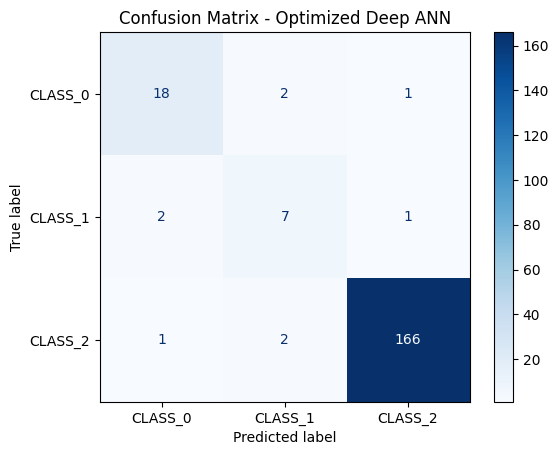

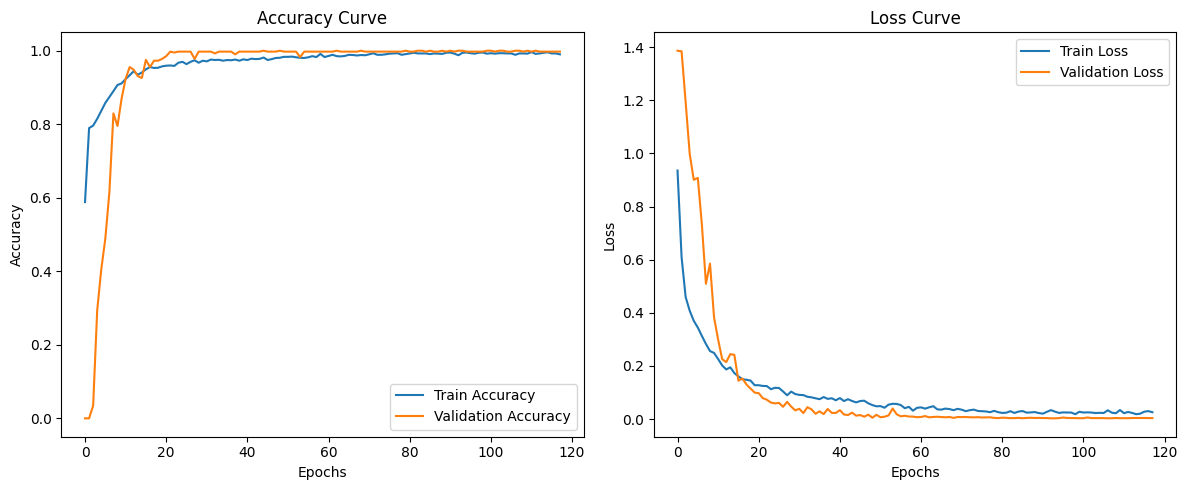

In [101]:
y_train_cat = to_categorical(y_train_res, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)
y_test_enc = y_test.values

model = Sequential([
    Input(shape=(X_train_res.shape[1],)),
    Dense(512, activation='relu'), Dropout(0.4),
    Dense(256, activation='relu'), Dropout(0.3),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'),  Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)]

history = model.fit(X_train_res, y_train_cat, validation_split=0.2,
                    epochs=200, batch_size=16, callbacks=callbacks, verbose=1)

test_loss, test_acc = model.evaluate(x_test_scaled, y_test_cat, verbose=0)
print(f"\n🔹 Optimized Deep ANN Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
print("\n🔍 Classification Report:")
print(classification_report(y_test_enc, y_pred))

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['CLASS_0', 'CLASS_1', 'CLASS_2'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Optimized Deep ANN")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title('Loss Curve')
plt.legend()

plt.tight_layout()
plt.show()
